In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [40]:
df = pd.read_csv("../Data/heart-disease.csv")

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Exploration and Feature Engineering

<AxesSubplot:>

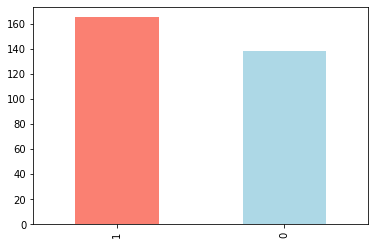

In [43]:
df['target'].value_counts().plot.bar(color=["salmon","lightblue"])
# sns.countplot(data=df, x = 'target', palette="coolwarm")

In [44]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

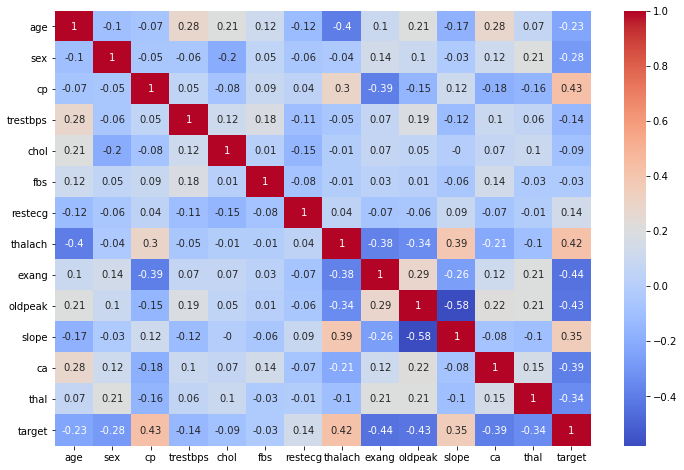

In [45]:
#Correlation Studies
plt.figure(figsize=(12, 8))
sns.heatmap(data=np.round(df.corr(),2), cmap="coolwarm", annot=True)

In [46]:
categorical_features = [features for features in df.columns if len(df[features].unique()) <= 5]
categorical_features.remove("target")
categorical_features


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [47]:
continuous_features = [features for features in df.columns if features not in categorical_features]
continuous_features.remove('target')
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [48]:
for features in categorical_features:
    print(f"{features} split")
    print(df[features].value_counts())
    print("\n")
    print(f"{features} split by target")
    print(pd.crosstab(df["target"], df[features]))
    print("\n\n")

sex split
1    207
0     96
Name: sex, dtype: int64


sex split by target
sex      0    1
target         
0       24  114
1       72   93



cp split
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


cp split by target
cp        0   1   2   3
target                 
0       104   9  18   7
1        39  41  69  16



fbs split
0    258
1     45
Name: fbs, dtype: int64


fbs split by target
fbs       0   1
target         
0       116  22
1       142  23



restecg split
1    152
0    147
2      4
Name: restecg, dtype: int64


restecg split by target
restecg   0   1  2
target            
0        79  56  3
1        68  96  1



exang split
0    204
1     99
Name: exang, dtype: int64


exang split by target
exang     0   1
target         
0        62  76
1       142  23



slope split
2    142
1    140
0     21
Name: slope, dtype: int64


slope split by target
slope    0   1    2
target             
0       12  91   35
1        9  49  107



ca split
0    175
1     65
2     38
3

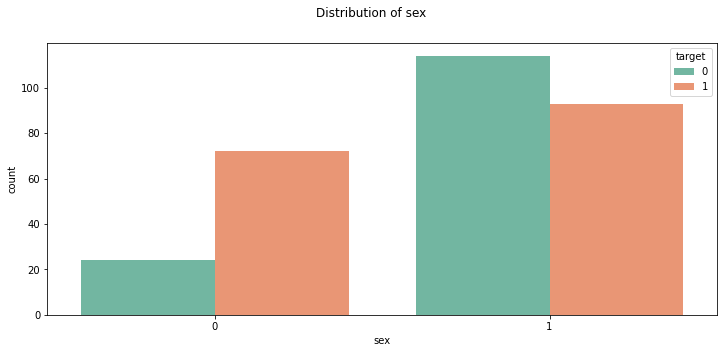

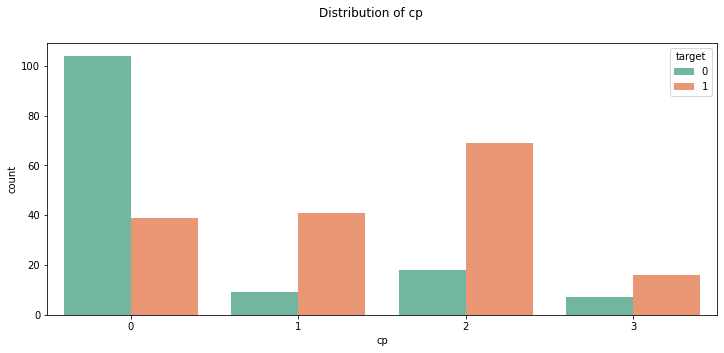

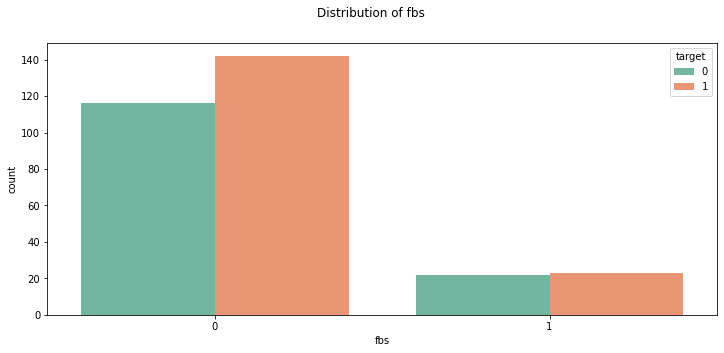

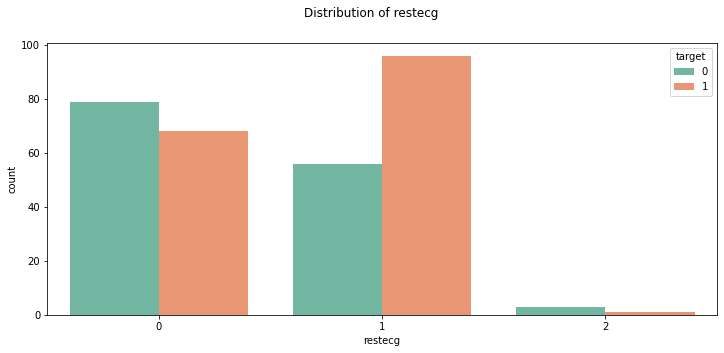

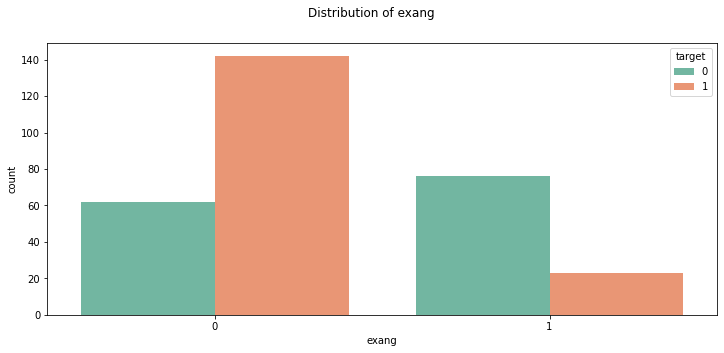

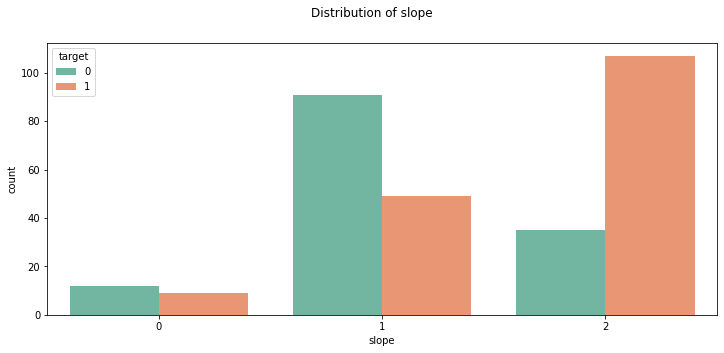

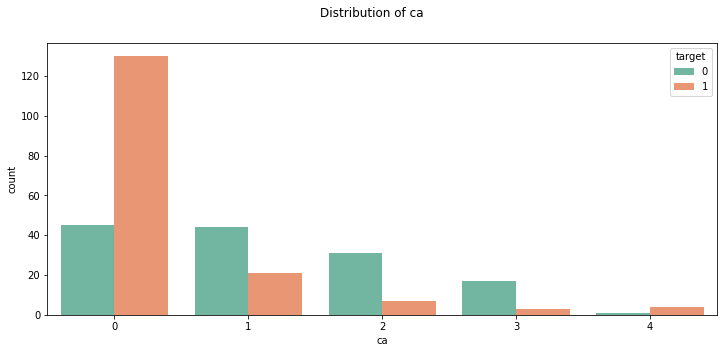

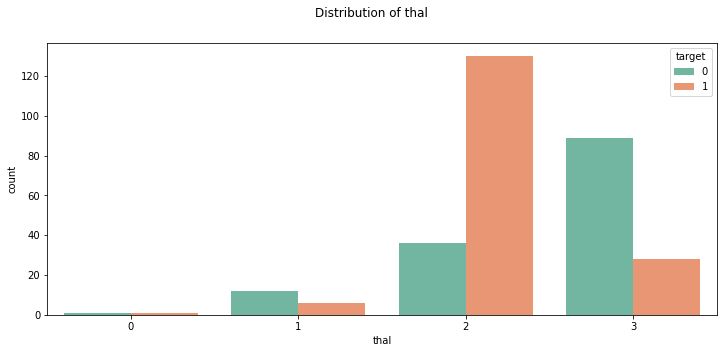

In [49]:
#Target Split with Catergorial Features (Visualisation)
for features in categorical_features:
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Distribution of {features}')
   
    sns.countplot(data=df, x=features , hue="target", palette="Set2")
   

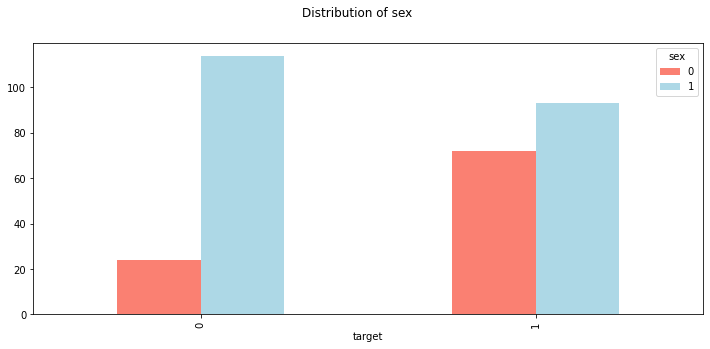

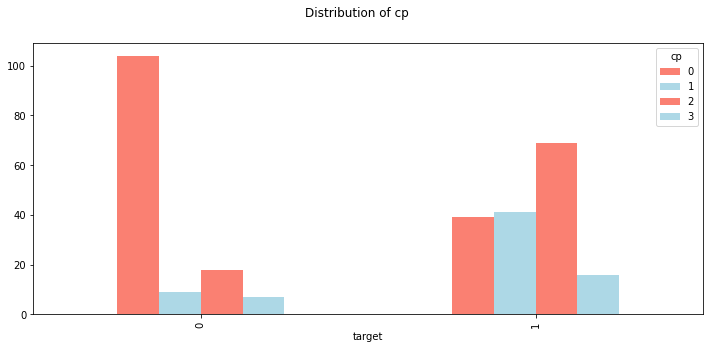

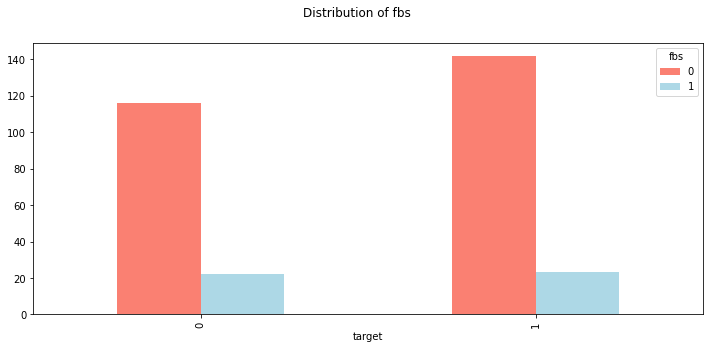

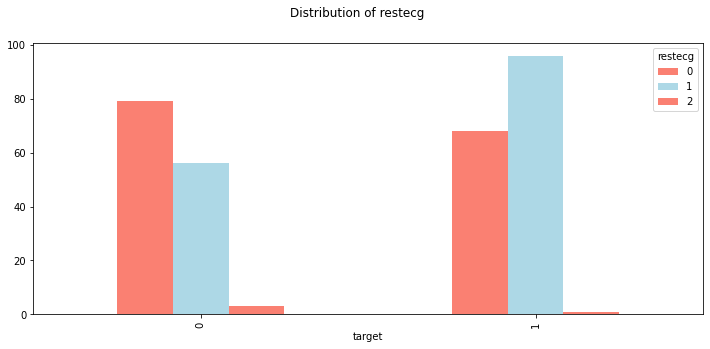

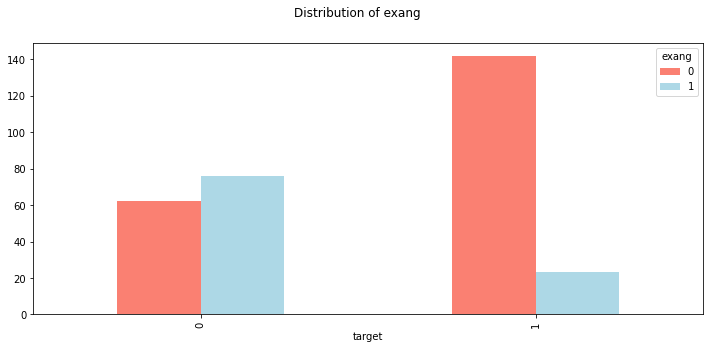

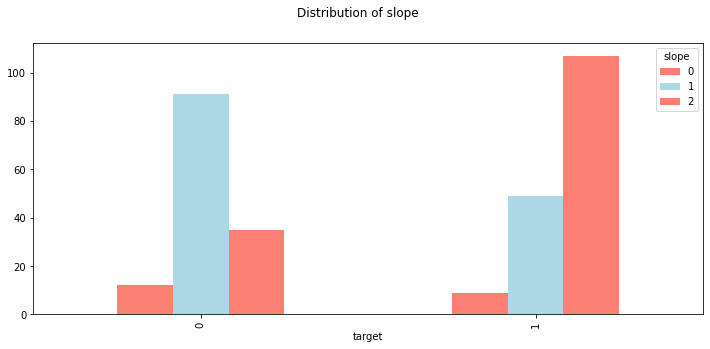

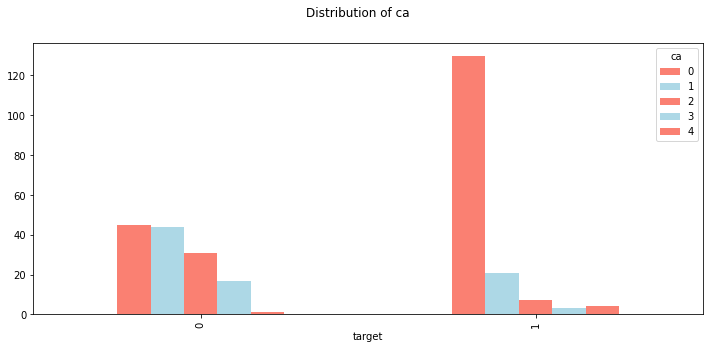

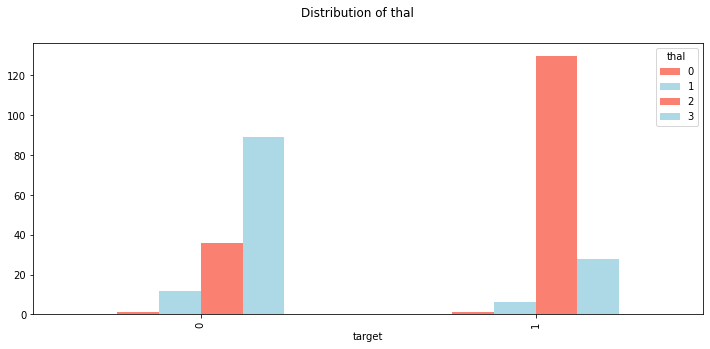

In [50]:
#Crosstab Plot

for features in categorical_features:

    pd.crosstab(df["target"], df[features]).plot.bar(figsize=(12,5), color= ["salmon","lightblue"])
    plt.suptitle(f'Distribution of {features}')

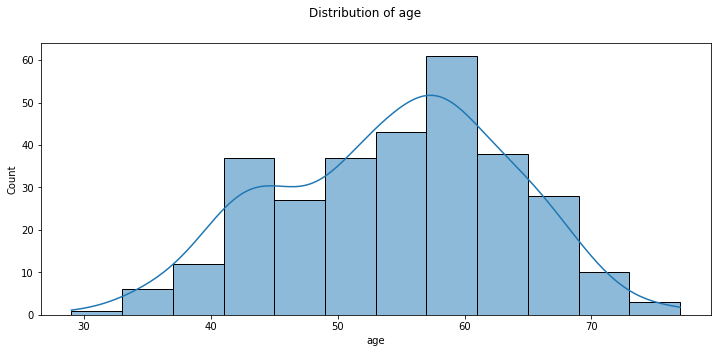

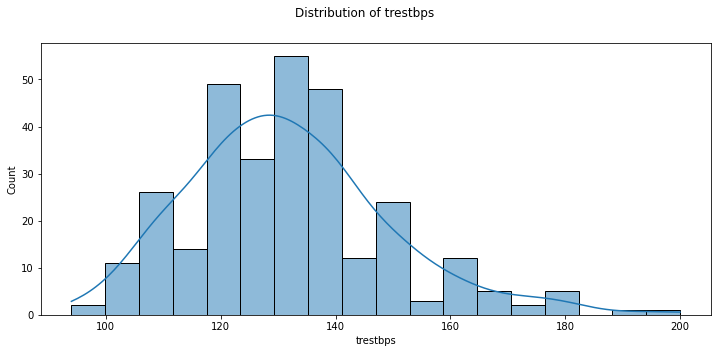

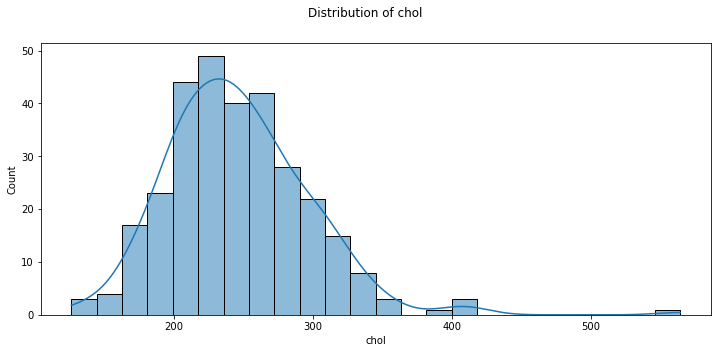

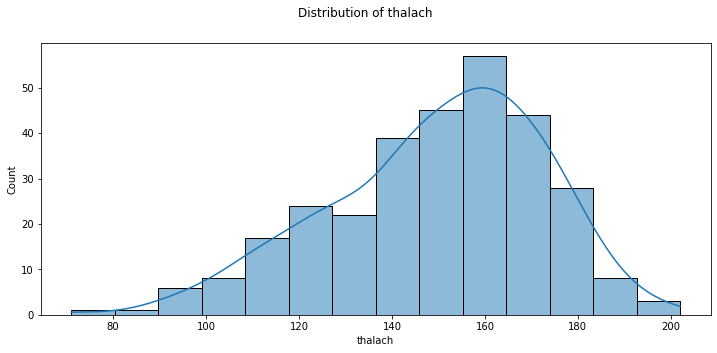

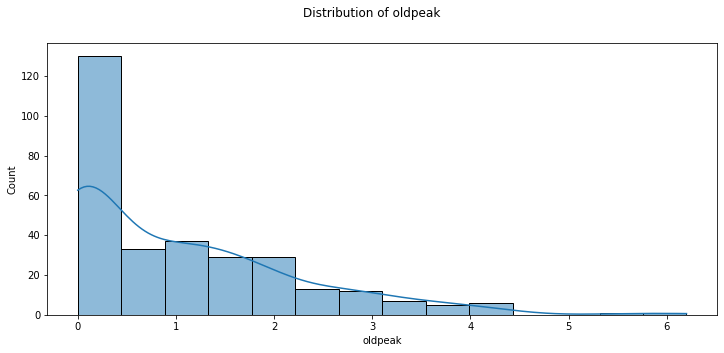

In [51]:
for features in continuous_features:
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Distribution of {features}')
    sns.histplot(data=df[features],kde=True)

In [52]:
confirmed = df[df["target"] == 1]
negative = df[df["target"] == 0]

confirmed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
negative.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


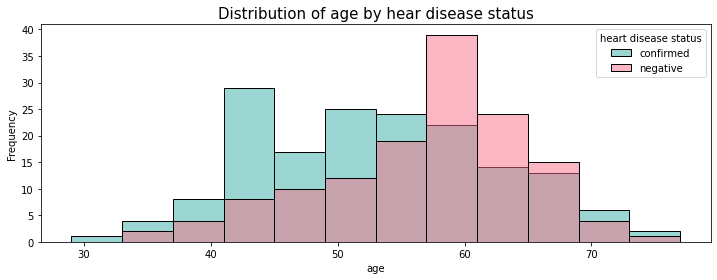

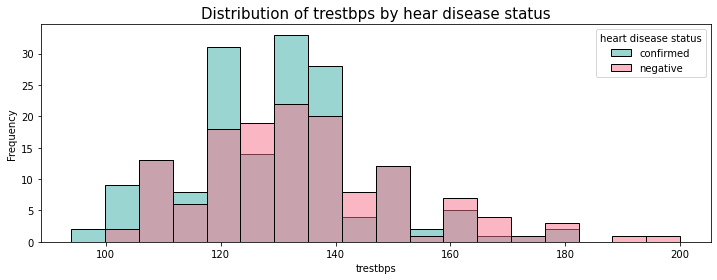

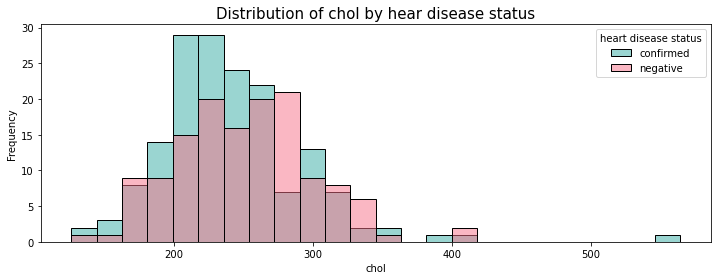

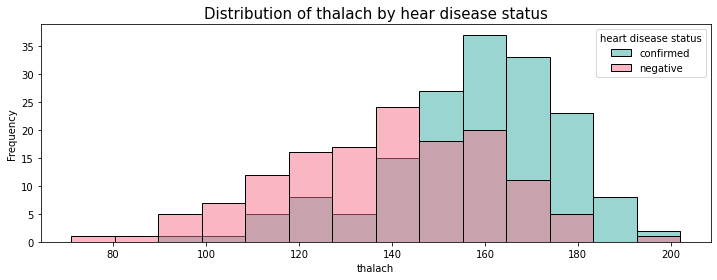

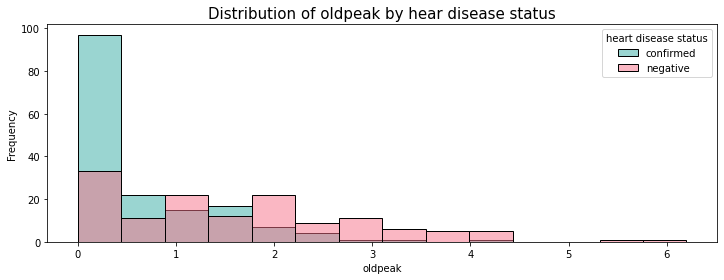

In [54]:
for features in continuous_features:
    plt.figure(figsize=(12,4))
    sns.histplot(data=df, x=features, hue='target',palette="husl")
    plt.legend(['confirmed', 'negative'], title = 'heart disease status', loc ='upper right', facecolor='white')
    plt.xlabel(f'{features}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {features} by hear disease status', size = 15)
    

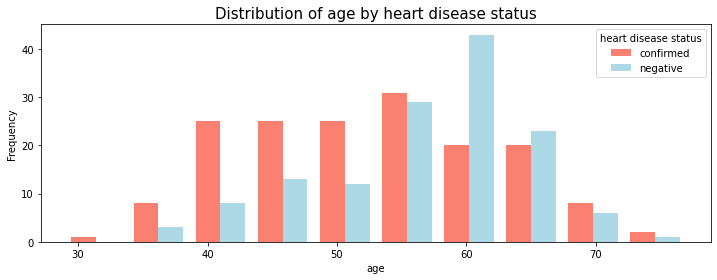

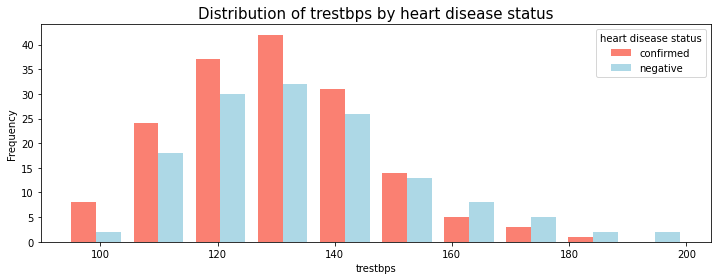

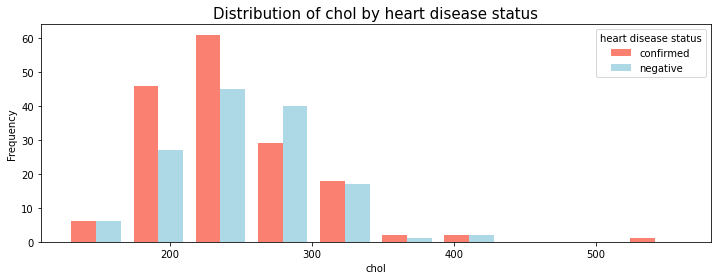

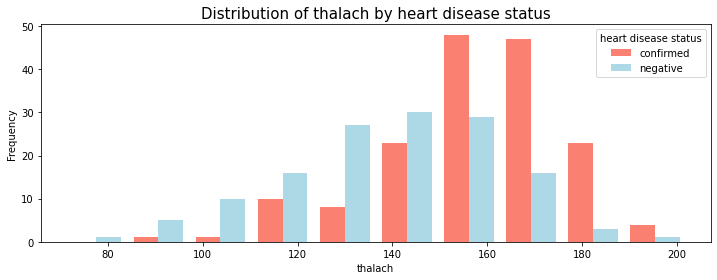

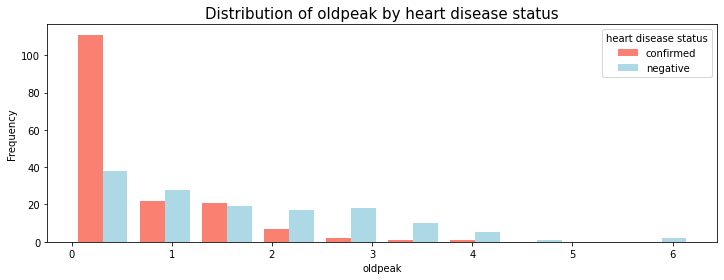

In [55]:
for features in continuous_features:
    a = confirmed[features]
    b = negative[features]
    plt.figure(figsize=(12,4))
    plt.hist(x=[a,b],color=["salmon","lightblue"])
    plt.legend(['confirmed', 'negative'], title = 'heart disease status', loc ='upper right', facecolor='white')
    plt.xlabel(f'{features}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {features} by heart disease status', size = 15)
#     plt.box(False)
    

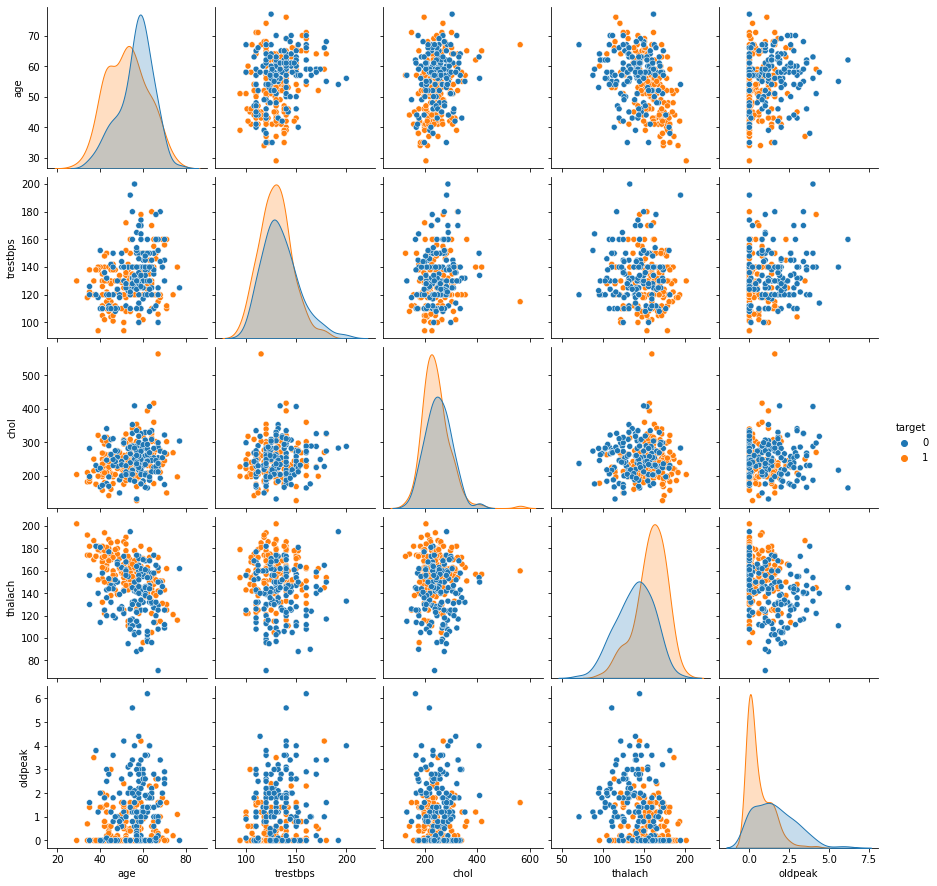

In [56]:

sns.pairplot(data=df.drop(categorical_features,axis=1),hue="target")


In [57]:
from scipy import stats
for features in categorical_features:
    
    cross = pd.crosstab(df[features], df["target"])
    
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross)
    print(features)
    print(f'=== Chi2 Statistic===')
    print(chi2_stat)
    
    
    print(f'=== Degree of Freedom===')
    print(dof)
    
    
    print(f'===P-value===')
    print(p_val)


    print(f' === Contigency Table===')
    print(ex)
    print('\n')

sex
=== Chi2 Statistic===
22.717227046576355
=== Degree of Freedom===
1
===P-value===
1.8767776216941503e-06
 === Contigency Table===
[[ 43.72277228  52.27722772]
 [ 94.27722772 112.72277228]]


cp
=== Chi2 Statistic===
81.68642755194445
=== Degree of Freedom===
3
===P-value===
1.3343043373050064e-17
 === Contigency Table===
[[65.12871287 77.87128713]
 [22.77227723 27.22772277]
 [39.62376238 47.37623762]
 [10.47524752 12.52475248]]


fbs
=== Chi2 Statistic===
0.10627276301947715
=== Degree of Freedom===
1
===P-value===
0.7444281114149577
 === Contigency Table===
[[117.5049505 140.4950495]
 [ 20.4950495  24.5049505]]


restecg
=== Chi2 Statistic===
10.023091785081
=== Degree of Freedom===
2
===P-value===
0.006660598773498031
 === Contigency Table===
[[66.95049505 80.04950495]
 [69.22772277 82.77227723]
 [ 1.82178218  2.17821782]]


exang
=== Chi2 Statistic===
55.94454996665093
=== Degree of Freedom===
1
===P-value===
7.454409331235655e-14
 === Contigency Table===
[[ 92.91089109 111.0891

In [58]:
from scipy.stats import ttest_ind
for features in continuous_features:
 
    confirmed = df[df["target"] == 1][features]
    negative = df[df["target"] == 0][features]
    t_statistic, p_value = ttest_ind(confirmed, negative)

    print('===Test Results for ' + features + ' ====' )
    print('Test Statistics: {:.3f}'.format(t_statistic))
    print('P_value: {:.3f}'.format(p_value))
    print("\n\n")

===Test Results for age ====
Test Statistics: -4.015
P_value: 0.000



===Test Results for trestbps ====
Test Statistics: -2.541
P_value: 0.012



===Test Results for chol ====
Test Statistics: -1.484
P_value: 0.139



===Test Results for thalach ====
Test Statistics: 8.070
P_value: 0.000



===Test Results for oldpeak ====
Test Statistics: -8.280
P_value: 0.000





In [59]:
for features in continuous_features:
    print(features)
    confirmed = df[df["target"] == 1][features]
    negative = df[df["target"] == 0][features]
    print(f"Average {features} for confirmed cases: {round(sum(confirmed)/len(confirmed),2)}")
    print(f"Average {features} for negative cases: {round(sum(negative)/len(negative),2)} \n")

age
Average age for confirmed cases: 52.5
Average age for negative cases: 56.6 

trestbps
Average trestbps for confirmed cases: 129.3
Average trestbps for negative cases: 134.4 

chol
Average chol for confirmed cases: 242.23
Average chol for negative cases: 251.09 

thalach
Average thalach for confirmed cases: 158.47
Average thalach for negative cases: 139.1 

oldpeak
Average oldpeak for confirmed cases: 0.58
Average oldpeak for negative cases: 1.59 



## Testing Models

In [86]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [61]:
X= df.drop("target",axis=1)
y= df["target"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "SVC":SVC(),
         "Random Forest Classifier": RandomForestClassifier()}

for i in models:
    model = models[i]
    model.fit(X_train,y_train)
    print(f"{i} traing score: {model.score(X_train,y_train)}")
    print(f"{i} test score: {model.score(X_test,y_test)}")
    print("\n")

Logistic Regression traing score: 0.8553719008264463
Logistic Regression test score: 0.8852459016393442


KNN traing score: 0.7603305785123967
KNN test score: 0.6885245901639344


SVC traing score: 0.6570247933884298
SVC test score: 0.7049180327868853


Random Forest Classifier traing score: 1.0
Random Forest Classifier test score: 0.8524590163934426




/Users/enochamobire/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Hyperparmeter Tunnuing

### KNN

In [64]:
train_scores = []
test_scores = []

In [65]:

n_neighbors = list(range(1,20))

knn = KNeighborsClassifier()

for i in n_neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))




Maximum KNN score on the test data: 75.41%


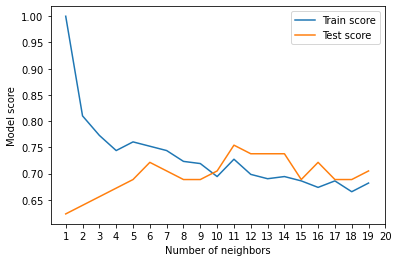

In [66]:
plt.plot(n_neighbors, train_scores, label="Train score")
plt.plot(n_neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Logistic Regression

In [70]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [71]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [72]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

### Random Forest Classifier

In [73]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}



# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.1s finished


In [74]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [75]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [76]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [77]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [78]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Metrics

In [79]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [80]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [83]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

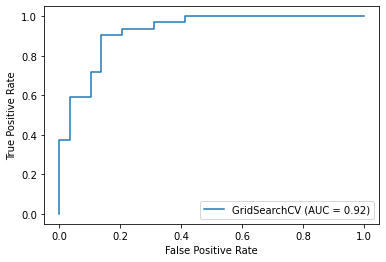

In [84]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [87]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))


[[25  4]
 [ 3 29]]


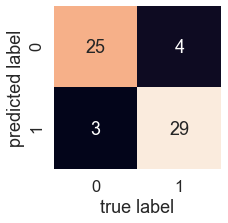

In [88]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [89]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [90]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [91]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [92]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [93]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [94]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

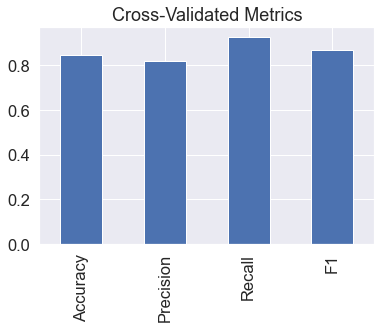

In [95]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature Importance

In [96]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [98]:
# Check coef_
# the coef_ attribute is the coefficient of the features in the decision function.
# the values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.
clf.coef_

array([[ 0.00369922, -0.90424086,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120402, -0.57590915,
         0.47095118, -0.6516535 , -0.69984201]])

In [102]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0036992187998289602,
 'sex': -0.9042408617254584,
 'cp': 0.6747282785211093,
 'trestbps': -0.011613403576031968,
 'chol': -0.0017036447029589036,
 'fbs': 0.04787688844705352,
 'restecg': 0.33490185589260435,
 'thalach': 0.02472938483022642,
 'exang': -0.6312040200034894,
 'oldpeak': -0.5759091523131389,
 'slope': 0.4709511814885769,
 'ca': -0.651653504206039,
 'thal': -0.6998420129807071}

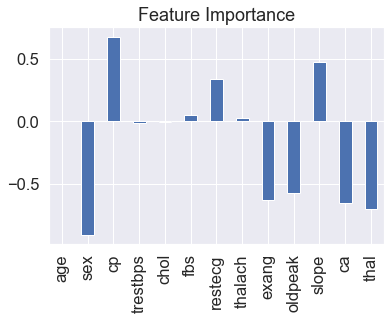

In [109]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

#The larger the value (bigger bar), the more the feature contributes to the models decision.